In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-level-2-training-2023/sample_submission.csv
/kaggle/input/shai-level-2-training-2023/train.csv
/kaggle/input/shai-level-2-training-2023/test/237487502.jpeg
/kaggle/input/shai-level-2-training-2023/test/578242651.jpeg
/kaggle/input/shai-level-2-training-2023/test/111993936.jpeg
/kaggle/input/shai-level-2-training-2023/test/491589162.jpeg
/kaggle/input/shai-level-2-training-2023/test/545163486.jpeg
/kaggle/input/shai-level-2-training-2023/test/267373811.jpeg
/kaggle/input/shai-level-2-training-2023/test/460439802.jpeg
/kaggle/input/shai-level-2-training-2023/test/69490724.jpeg
/kaggle/input/shai-level-2-training-2023/test/280574781.png
/kaggle/input/shai-level-2-training-2023/test/200701465.jpeg
/kaggle/input/shai-level-2-training-2023/test/425716630.jpeg
/kaggle/input/shai-level-2-training-2023/test/137560586.jpeg
/kaggle/input/shai-level-2-training-2023/test/256199202.png
/kaggle/input/shai-level-2-training-2023/test/372851859.jpeg
/kaggle/input/shai-level-2-training

In [2]:
import pathlib 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
for dirpath,dirnames,filenames in os.walk("/kaggle/input/shai-level-2-training-2023"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 2 images in '/kaggle/input/shai-level-2-training-2023'.
there are 0 directories and 513 images in '/kaggle/input/shai-level-2-training-2023/test'.
there are 3 directories and 0 images in '/kaggle/input/shai-level-2-training-2023/train'.
there are 0 directories and 468 images in '/kaggle/input/shai-level-2-training-2023/train/normal'.
there are 0 directories and 295 images in '/kaggle/input/shai-level-2-training-2023/train/covid'.
there are 0 directories and 433 images in '/kaggle/input/shai-level-2-training-2023/train/virus'.


In [4]:
data_dir = pathlib.Path("/kaggle/input/shai-level-2-training-2023/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [5]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['32760298.jpeg']
image shape (1499, 1800)


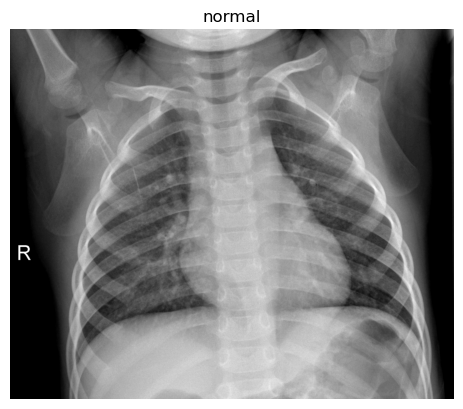

In [6]:
img = view_image("/kaggle/input/shai-level-2-training-2023/train/","normal")

['449940122.jpeg']
image shape (928, 1440)


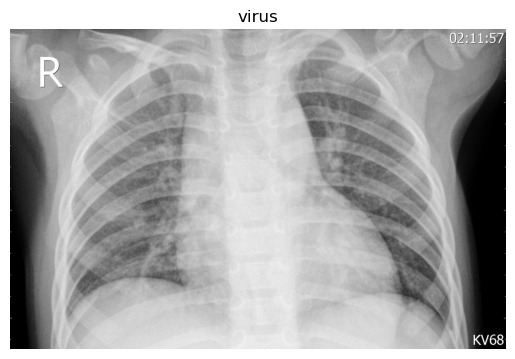

In [7]:
img = view_image("/kaggle/input/shai-level-2-training-2023/train/","virus")

['155808512.png']
image shape (480, 640, 3)


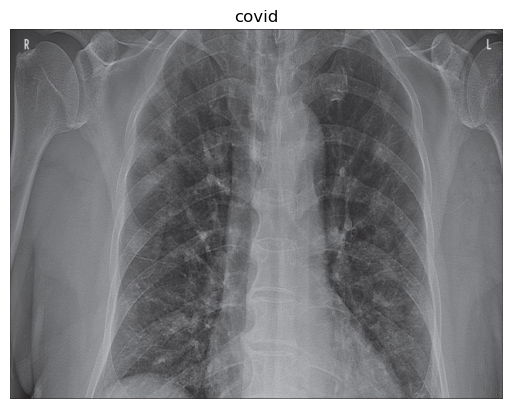

In [8]:
img = view_image("/kaggle/input/shai-level-2-training-2023/train/","covid")

In [9]:
data=[]
labels=[]
covid=os.listdir("/kaggle/input/shai-level-2-training-2023/train/covid/")
for a in covid:

    image = cv2.imread("/kaggle/input/shai-level-2-training-2023/train/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [10]:
normal=os.listdir("/kaggle/input/shai-level-2-training-2023/train/normal/")
for a in normal:

    image = cv2.imread("/kaggle/input/shai-level-2-training-2023/train/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [11]:
virus=os.listdir("/kaggle/input/shai-level-2-training-2023/train/virus/")
for a in virus:

    image = cv2.imread("/kaggle/input/shai-level-2-training-2023/train/virus/"+a,)
    image = cv2.resize(image, (224, 224))
    

    data.append(image)
    labels.append(2)

In [12]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [14]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [17]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
21/21 [==============================] - 22s 382ms/step - loss: 0.9960 - accuracy: 0.5471 - val_loss: 0.7150 - val_accuracy: 0.6864
Epoch 2/15
21/21 [==============================] - 3s 126ms/step - loss: 0.5439 - accuracy: 0.8146 - val_loss: 0.4452 - val_accuracy: 0.8432
Epoch 3/15
21/21 [==============================] - 3s 127ms/step - loss: 0.3428 - accuracy: 0.8625 - val_loss: 0.4478 - val_accuracy: 0.8362
Epoch 4/15
21/21 [==============================] - 3s 127ms/step - loss: 0.2176 - accuracy: 0.9193 - val_loss: 0.3662 - val_accuracy: 0.8641
Epoch 5/15
21/21 [==============================] - 3s 127ms/step - loss: 0.1346 - accuracy: 0.9492 - val_loss: 0.4492 - val_accuracy: 0.8885
Epoch 6/15
21/21 [==============================] - 3s 127ms/step - loss: 0.1956 - accuracy: 0.9372 - val_loss: 0.3102 - val_accuracy: 0.9024
Epoch 7/15
21/21 [==============================] - 3s 130ms/step - loss: 0.1163 - accuracy: 0.9611 - val_loss: 0.4195 - val_accuracy: 0.9059
Epoch

In [18]:
loss = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Training-Validation Accuracy')

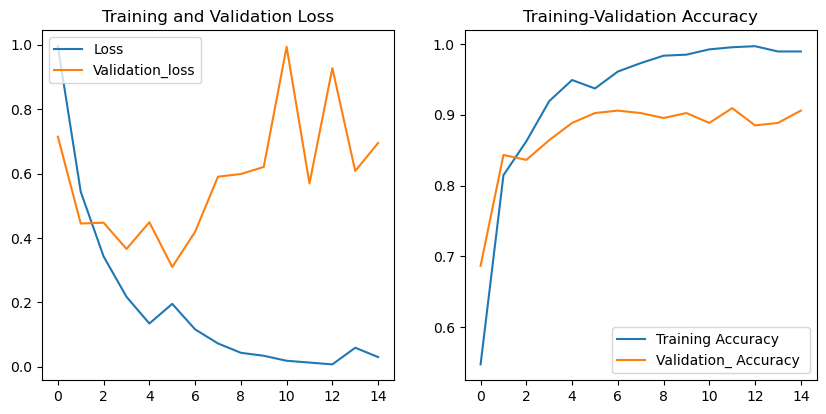

In [19]:
#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [20]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

8/8 [==============================] - 1s 136ms/step


In [21]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.91      0.97      0.94        97
           2       0.96      0.84      0.90        83

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.92       240
weighted avg       0.93      0.93      0.92       240



In [22]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,58,0,2
normal,2,94,1
virus,4,9,70


In [23]:
# make a prediction
import csv

# Path to the directory containing the images
images_dir = "/kaggle/input/shai-level-2-training-2023/test"

# List to hold the predictions
predictions = []

# Loop over the images in the directory
for image_file in os.listdir(images_dir):
    
    # Load the image
    image_path = os.path.join(images_dir, image_file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))

    # Make a prediction on the image
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_class = class_names[np.argmax(prediction)]

    # Append the prediction to the list
    predictions.append((image_file, predicted_class))

1/1 [==============================] - 0s 21ms/step


In [24]:
with open("submission.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Image", "Label"])
    for prediction in predictions:
        writer.writerow(prediction)

In [25]:
import pandas as pd
pred = pd.read_csv("/kaggle/working/submission.csv")
pred.head()

,Image,Label
0,237487502.jpeg,normal
1,578242651.jpeg,normal
2,111993936.jpeg,virus
3,491589162.jpeg,virus
4,545163486.jpeg,virus


In [26]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17225924/17225924 [==============================] - 0s 0us/step


In [27]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [28]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [30]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
21/21 [==============================] - 7s 175ms/step - loss: 9.2657 - accuracy: 0.7459 - val_loss: 0.7373 - val_accuracy: 0.9443
Epoch 2/15
21/21 [==============================] - 1s 64ms/step - loss: 0.3606 - accuracy: 0.9701 - val_loss: 0.8494 - val_accuracy: 0.9443
Epoch 3/15
21/21 [==============================] - 2s 79ms/step - loss: 0.3418 - accuracy: 0.9731 - val_loss: 0.7643 - val_accuracy: 0.9512
Epoch 4/15
21/21 [==============================] - 1s 65ms/step - loss: 0.6627 - accuracy: 0.9671 - val_loss: 0.7644 - val_accuracy: 0.9617
Epoch 5/15
21/21 [==============================] - 1s 65ms/step - loss: 0.4046 - accuracy: 0.9746 - val_loss: 2.1536 - val_accuracy: 0.8920
Epoch 6/15
21/21 [==============================] - 2s 80ms/step - loss: 0.2176 - accuracy: 0.9821 - val_loss: 1.4524 - val_accuracy: 0.9477
Epoch 7/15
21/21 [==============================] - 1s 65ms/step - loss: 0.0520 - accuracy: 0.9940 - val_loss: 0.7877 - val_accuracy: 0.9721
Epoch 8/15
2

Text(0.5, 1.0, 'Training-Validation Accuracy')

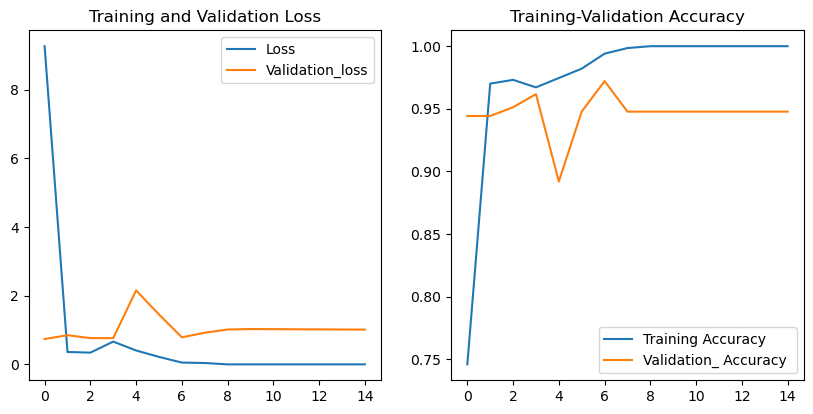

In [31]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [32]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

8/8 [==============================] - 1s 78ms/step


In [33]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.93      0.97      0.95        97
           2       0.96      0.90      0.93        83

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



In [34]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,59,0,1
normal,1,94,2
virus,1,7,75


In [35]:
# make a prediction
import csv

# Path to the directory containing the images
images_dir = "/kaggle/input/shai-level-2-training-2023/test"

# List to hold the predictions
predictions = []

# Loop over the images in the directory
for image_file in os.listdir(images_dir):
    
    # Load the image
    image_path = os.path.join(images_dir, image_file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))

    # Make a prediction on the image
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_class = class_names[np.argmax(prediction)]

    # Append the prediction to the list
    predictions.append((image_file, predicted_class))

1/1 [==============================] - 0s 23ms/step


In [36]:
with open("sample_submission.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Image", "Label"])
    for prediction in predictions:
        writer.writerow(prediction)

In [37]:
import pandas as pd
pred = pd.read_csv("/kaggle/working/sample_submission.csv")
pred.head()

,Image,Label
0,237487502.jpeg,covid
1,578242651.jpeg,covid
2,111993936.jpeg,virus
3,491589162.jpeg,virus
4,545163486.jpeg,virus
